In [2]:
#!/usr/bin/env python3
# -*- coding: UTF-8 -*-

"""
2019-05-20
"""

import matplotlib.pyplot as plt
import numpy as np


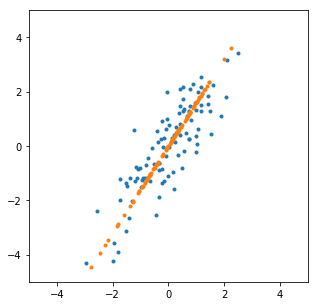

In [5]:
#from last classes:

plt.figure(figsize=(5, 5))
plt.xlim(-5., 5.)
plt.ylim(-5., 5.)

mean = np.array([1., -0.5])
covariance = np.array([[1., 1.2],[1.2, 2.]])
count = 100
XT = np.random.multivariate_normal(mean, covariance, count)
XT -= XT.mean(0)
plt.plot(XT[:,0], XT[:,1], ".")

Cx = XT.T @ XT / count
U, S2, _ = np.linalg.svd(Cx)
YT = XT @ U
YRT = YT[:, :1]
XRT = np.insert(YRT, 1, 0., 1) @ U.T
plt.plot(XRT[:,0], XRT[:, 1], ".")
plt.show()


In [8]:
print("variance in original data:")
print((XT**2).sum() / count)
print(Cx.trace())
print(S2.sum())

variance in original data:
3.5854647187550395
3.5854647187550395
3.58546471875504


cumulated fractions of variance in original data:
[0.79233477 0.94635177 0.9564975  0.9654153  0.97362246 0.98001755
 0.98550511 0.99069676 0.99542629 1.        ]
fraction and retained axes
0.9 2


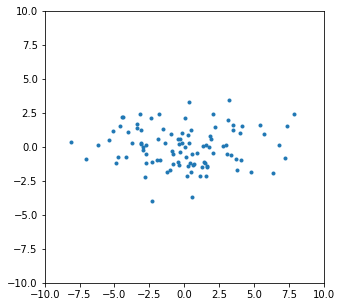

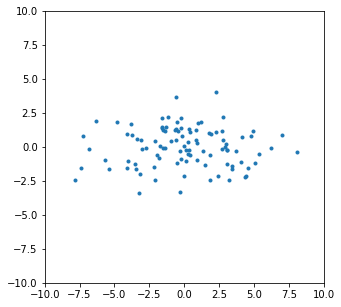

In [15]:
from scipy import stats
from sklearn import decomposition

size = 10
mean = 20. * np.random.random_sample(size) - 10.
variances = np.array([10., 2., 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
transform = stats.ortho_group.rvs(dim=size)
covariance = transform @ np.diag(variances) @ transform.T

count = 100
XT = np.random.multivariate_normal(mean, covariance, count)
XT -= XT.mean(0)

Cx = XT.T @ XT / count
U, S2, _ = np.linalg.svd(Cx)

print("cumulated fractions of variance in original data:")
fractions = S2.cumsum() / S2.sum() #niezerowych wartości osobliwych
print(fractions)

print("fraction and retained axes")
fraction = 0.9
axes = 1 + fractions.searchsorted(fraction)
print(fraction,axes)

plt.figure(figsize=(5,5))
plt.xlim(-10.,10.)
plt.ylim(-10.,10.)

YT = XT @ U
YRT = YT[:, :axes]
plt.plot(YRT[:, 0], YRT[:, 1], ".")

plt.figure(figsize=(5,5))
plt.xlim(-10.,10.)
plt.ylim(-10.,10.)

pca = decomposition.PCA(fraction)
pca.fit(XT)
YRT = pca.transform(XT)
plt.plot(YRT[:, 0], YRT[:, 1], ".")

plt.show()

(768, 1024)


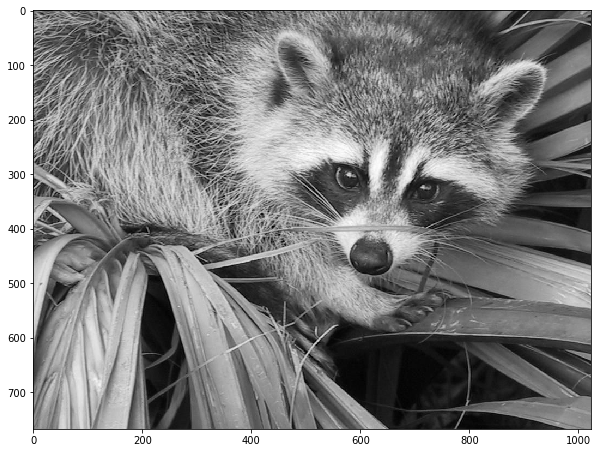

In [26]:
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt

#X = misc.face() # color
X = misc.face(True) #black-white
print(X.shape)

plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(X)

nb of fractions: 768
50 32


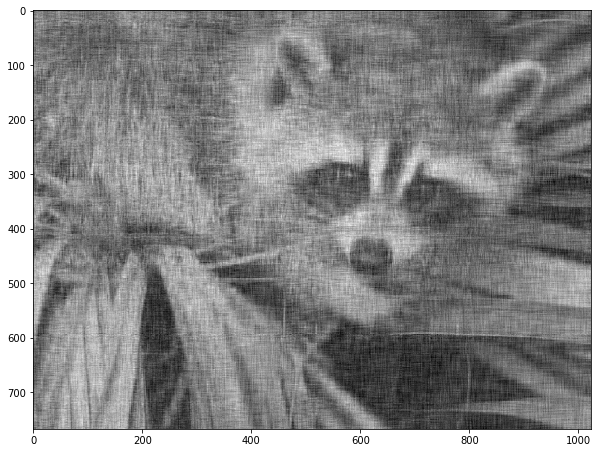

In [64]:
# kompresja obrazu oparta na svd

U, S, VT = np.linalg.svd(X)

# wykres wartośći osobliwych -> cała informacaj jest zawarta w początkowych wyrazach
#plt.figure()
#plt.plot(S)

fractions = S.cumsum() / S.sum()
print("nb of fractions:", len(fractions)) 

fraction = 50
axes = 32 # try with different values
print(fraction, axes)

Y = U[:, :axes] @ np.diag(S[:axes]) @ VT[:axes, :]

plt.figure(figsize=(10,10))
plt.imshow(Y)
plt.show()

(768, 1024)


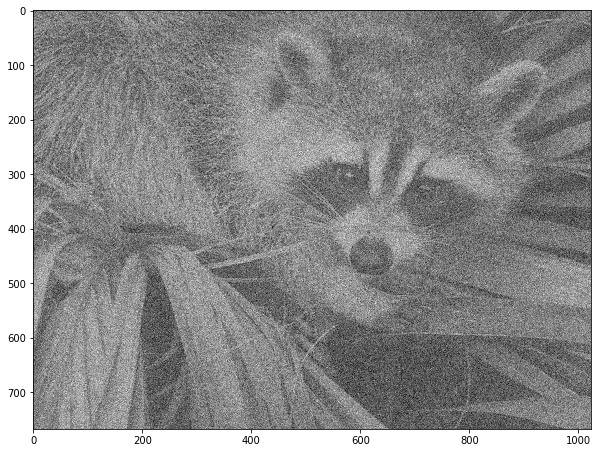

In [65]:
# zaszumianie obrazu (szumem gaussowskim)

#X = misc.face() # color
X = misc.face(True).astype(np.float) #black-white
print(X.shape)
X += np.random.normal(scale=X.std(), size=X.shape)

plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(X)

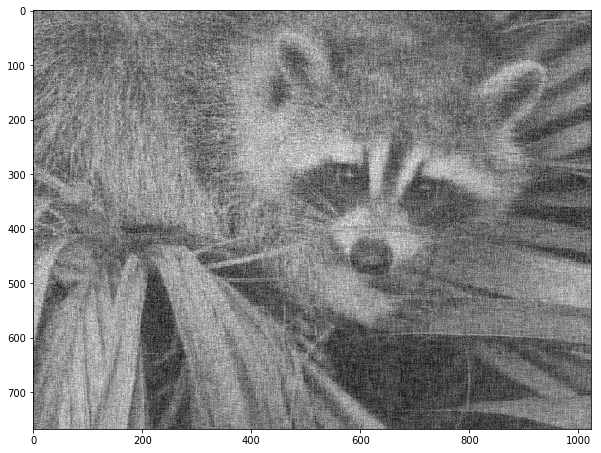

In [68]:
# odszumianie obrazu

U, S, VT = np.linalg.svd(X)

axes = 72 # try with different values
Y = U[:, :axes] @ np.diag(S[:axes]) @ VT[:axes, :]

plt.figure(figsize=(10,10))
plt.imshow(Y)
plt.show()

cumulated fractions of variance in original data:
fraction and retained axes
0.5 2


IndexError: index 1 is out of bounds for axis 1 with size 1

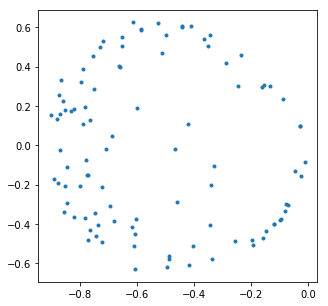

<Figure size 360x360 with 0 Axes>

In [74]:
# 3rd method of pca: 

from scipy import stats
from sklearn import decomposition

size = 10
mean = 20. * np.random.random_sample(size) - 10.
variances = np.array([10., 2., 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
transform = stats.ortho_group.rvs(dim=size)
covariance = transform @ np.diag(variances) @ transform.T

count = 100
XT = np.random.multivariate_normal(mean, covariance, count)
XT -= XT.mean(0)

K = XT @ XT.T
V, S2, _ = np.linalg.svd(K)

print("cumulated fractions of variance in original data:")
fractions = S2.cumsum() / S2.sum() #niezerowych wartości osobliwych
#print(fractions)

print("fraction and retained axes")
fraction = 0.9
axes = 1 + fractions.searchsorted(fraction)
print(fraction,axes)

plt.figure(figsize=(5,5))
plt.xlim(-10.,10.)
plt.ylim(-10.,10.)

YRT = V[:, :axes] * np.sqrt(S2[:axes])
plt.plot(YRT[:, 0], YRT[:, 1], ".")

plt.figure(figsize=(5,5))
plt.xlim(-10.,10.)
plt.ylim(-10.,10.)

pca = decomposition.PCA(fraction)
pca.fit(XT)
YRT = pca.transform(XT)
plt.plot(YRT[:, 0], YRT[:, 1], ".")

plt.figure(figsize=(5,5))
plt.xlim(-10.,10.)
plt.ylim(-10.,10.)

ZT = np.sqrt(count) * V
ZRT = ZT[:, :axes]
plt.plot(ZRT[:,0], ZRT[:,1], ".")

plt.show()